### How to take labeled AnnData object and Calculate Gene Ditributions

In [1]:
import squidpy as sq
from hest import iter_hest
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


#### Get AnnData from SpatialliBD
* Using MISC1 for now sample 151676

In [5]:
sample = ad.read_h5ad(f"assets/test_data/MISC3_151674/MISC3.h5")
c = 4
t = 0.5  # spatial clustering threshold
sample.obs.columns


Index(['in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres',
       'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito',
       '151674_MISC3_clgraph_3_clusters.csv',
       '151674_MISC3_clgraph_7_clusters.csv',
       '151674_MISC3_clgraph_4_clusters.csv',
       '151674_MISC3_clgraph_8_clusters.csv',
       '151674_MISC3_clgraph_2_clusters.csv',
       '151674_MISC3_clgraph_5_clusters.csv',
       '151674_MISC3_clgraph_9_clusters.csv',
       '151674_MISC3_clgraph_6_clusters.csv'],
      dtype='object')

### Use Moran's I to calculate Spatially Variable Genes

np.int64(47)

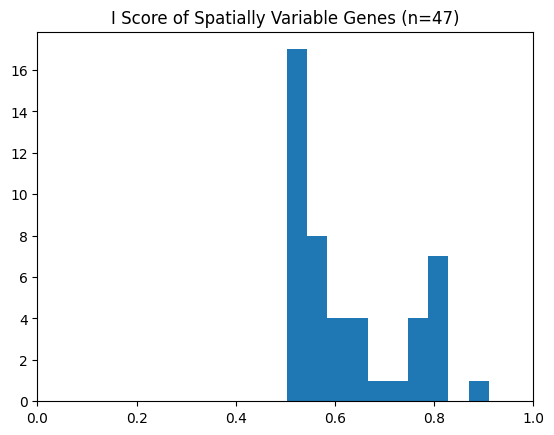

In [3]:
i_score = sample.uns['moranI']
genes_of_interest = i_score['I'] > t

plt.hist(i_score.loc[genes_of_interest,'I'])
plt.title(f"I Score of Spatially Variable Genes (n={genes_of_interest.sum()})")
plt.xlim((0,1))
genes_of_interest.sum()

### Use deepst 7 clusters

Text(0, 0.5, 'Clusters')

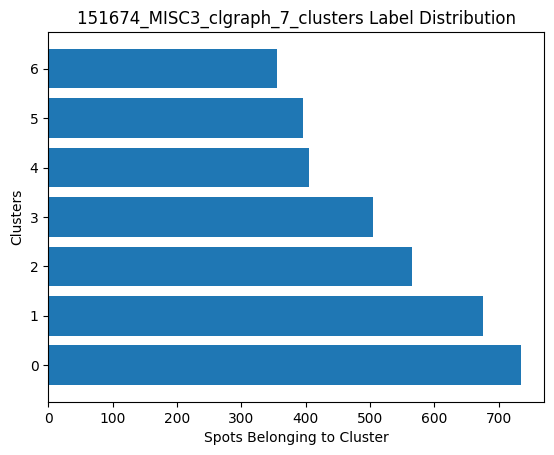

In [7]:
dst_7 = '151674_MISC3_clgraph_7_clusters.csv'
cluster_counts = sample.obs[dst_7].value_counts()
plt.barh(cluster_counts.index,cluster_counts)
plt.title(f"{dst_7.split('.')[0]} Label Distribution")
plt.xlabel("Spots Belonging to Cluster")
plt.ylabel("Clusters")

### Plot Gene Counts

In [8]:
def plot_gene_dist(count_vector:np.ndarray,n_genes:int):
    plt.bar(list(range(count_vector.shape[0])),np.log(count_vector + 1))
    plt.xlabel("Gene ID")
    plt.ylabel(f"log(gene counts + 1)")
    plt.xlim((0,n_genes))

### Plot all genes (Takes ~30s)

Text(0.5, 1.0, 'Cluster 4 Gene Count Distribution')

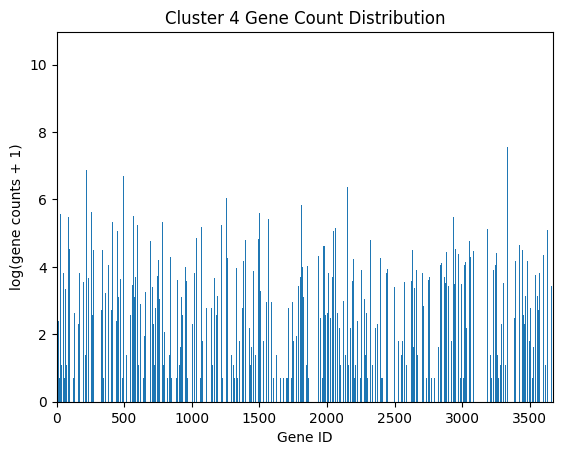

In [11]:
clust = sample.obs[dst_7] == c
gene_counts = sample.X.toarray()


clust_genes = sample.X.toarray()[clust,:][:,:].sum(axis = 0)
plot_gene_dist(clust_genes,gene_counts.shape[0])
plt.title(f"Cluster {c} Gene Count Distribution")



### Plot Genes of interest

Text(0.5, 1.0, 'Cluster 4 Variable Gene Count Distribution')

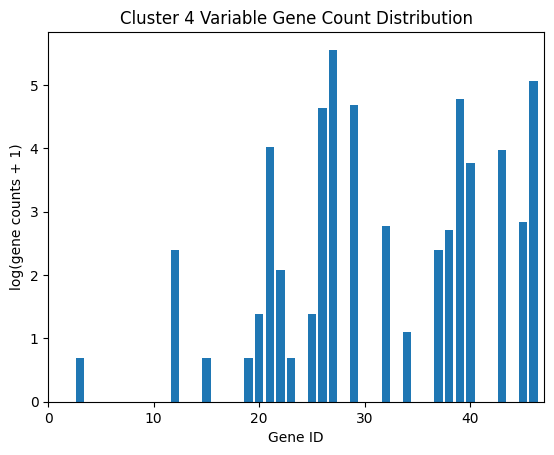

In [10]:
clust_var_genes = sample.X.toarray()[clust,:][:,genes_of_interest].sum(axis = 0)

plot_gene_dist(clust_var_genes,genes_of_interest.sum())
plt.title(f"Cluster {c} Variable Gene Count Distribution")
